Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 312us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 94us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 100us/step - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 83us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 93us/step - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 84us/step - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - 0s 97us/step - loss: 2.0721 - acc: 0.2071 - val_loss: 2.0727 - val_acc: 0.2067
Epoch 8

700/700 [==============================] - 0s 83us/step - loss: 1.6661 - acc: 0.3129 - val_loss: 1.8220 - val_acc: 0.2200
Epoch 121/1000
700/700 [==============================] - 0s 85us/step - loss: 1.6646 - acc: 0.3086 - val_loss: 1.8132 - val_acc: 0.2233
Epoch 122/1000
700/700 [==============================] - 0s 83us/step - loss: 1.6637 - acc: 0.3229 - val_loss: 1.8194 - val_acc: 0.2200
Epoch 123/1000
700/700 [==============================] - 0s 84us/step - loss: 1.6633 - acc: 0.3100 - val_loss: 1.8142 - val_acc: 0.2200
Epoch 124/1000
700/700 [==============================] - 0s 81us/step - loss: 1.6619 - acc: 0.3143 - val_loss: 1.8188 - val_acc: 0.2267
Epoch 125/1000
700/700 [==============================] - 0s 87us/step - loss: 1.6608 - acc: 0.3243 - val_loss: 1.8219 - val_acc: 0.2333


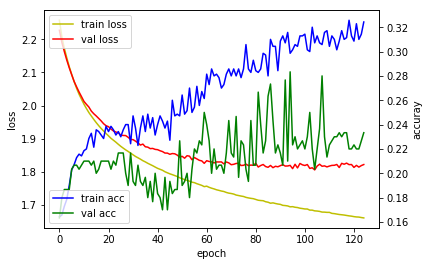

In [3]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
es=EarlyStopping(patience=20) #조기 종료 콜백함수 객체
hist = model.fit(X_train, Y_train,callbacks=[es], epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [7]:
sentence=("The regret after not doing something is bigger than that of doing something "
          "Ability is decided by one's own effort "
          "The difficulty in life is the choice.")
sentence

"The regret after not doing something is bigger than that of doing something Ability is decided by one's own effort The difficulty in life is the choice."

In [8]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn

In [21]:
tf.reset_default_graph()

In [22]:
charSet=list(set(sentence))
charDic={w:i for i, w in enumerate(charSet)}
charDic

{'i': 0,
 'n': 1,
 ' ': 2,
 'a': 3,
 'h': 4,
 'b': 5,
 'g': 6,
 'd': 7,
 'm': 8,
 'T': 9,
 '.': 10,
 'f': 11,
 'c': 12,
 'u': 13,
 'y': 14,
 'A': 15,
 'r': 16,
 "'": 17,
 's': 18,
 't': 19,
 'e': 20,
 'w': 21,
 'l': 22,
 'o': 23}

In [23]:
data_dim=len(charDic) #input_dim = 24차원
num_classes=hidden_size=data_dim
sequence_length=10
learning_rate=0.1

In [24]:
datax=[]
datay=[]
#len(sentence) # 글자수 152
for i in range(0, len(sentence)-sequence_length): #(0,152-10)=>(0,142)
    xstr=sentence[i:i+sequence_length] #1~10
    ystr=sentence[i+1:i+sequence_length+1] #2~11
    #print(i, xstr, '->', ystr)
    x=[charDic[c] for c in xstr]
    y=[charDic[c] for c in ystr]
#     print(x)
#     print(y)
    datax.append(x)
    datay.append(y)
batch_size=len(datax) #142

x=tf.placeholder(tf.int32, [None, sequence_length])
y=tf.placeholder(tf.int32, [None, sequence_length])

x_one_hot=tf.one_hot(x, num_classes)
print(x_one_hot)

def lstm_cell():
    cell=rnn.BasicLSTMCell(hidden_size)
    return cell
multi_cells=rnn.MultiRNNCell([lstm_cell() for _ in range(2)])
outputs, _states=tf.nn.dynamic_rnn(multi_cells,x_one_hot, dtype=tf.float32)

xforfc=tf.reshape(outputs, [-1, hidden_size])
outputs=tf.contrib.layers.fully_connected(xforfc, num_classes, activation_fn=None)
outputs=tf.reshape(outputs, [batch_size, sequence_length, num_classes])
weights=tf.ones([batch_size, sequence_length])
sequence_loss=tf.contrib.seq2seq.sequence_loss(
logits=outputs, targets=y, weights=weights)
meanLoss=tf.reduce_mean(sequence_loss)
train=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(meanLoss)


Tensor("one_hot:0", shape=(?, 10, 24), dtype=float32)


In [30]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(500):
    _, cv, res=sess.run([train, meanLoss, outputs], feed_dict={x:datax, y:datay})
    for j,result in enumerate(res):
        index=np.argmax(result, axis=1)
        #print(i,j,''.join([charSet[t] for t in index]), cv)

res=sess.run(outputs, feed_dict={x:datax})        
#print(res)
for j, result in enumerate(res):    
    index=np.argmax(result, 1)
    if j is 0:
        print(''.join([charSet[t] for t in index]), end='')
    
    print(charSet[index[-1]],end='')
        

he regret  after not doing something As bigger than that of doing something Ability is decided by one's own effort The difficulty in life is the choice.

In [2]:
import pandas as pd
data=pd.read_csv("spam.csv", encoding='latin1')


In [3]:
data.head()
data.info()
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [4]:
data
#ham->0, spam->1 변경
data['v1']=data['v1'].replace(['ham','spam'],[0,1])
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [5]:
data.isnull().values.any()

False

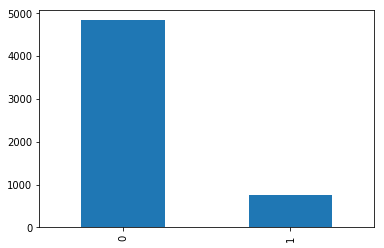

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
data['v1'].value_counts().plot(kind='bar')

In [7]:
ydata=data['v1']
xdata=data['v2']
len(xdata)

5572

In [8]:
#1. 문장을 단어 단위로 토큰화
#2. 단어 토큰 -> 정수로 인코딩

In [9]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [10]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(xdata) #각 행에 대한 토큰화 수행
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(xdata)#정수로 저장


In [11]:
sequences[:5]
len(word_index) #8920(voc의 크기)

8920

In [12]:
len(sequences) #5572(행의 개수)

5572

In [13]:
trainData=int(len(sequences)*0.8)
testData=int(len(sequences)-trainData)
trainData #4457
testData #1115

1115

In [14]:
#메일의 최대 길이 출력(xdata)
max(len(d) for d in sequences) #189
#메일의 평균 길이
sum(map(len, sequences)) / len(sequences) #15.79

15.794867193108399

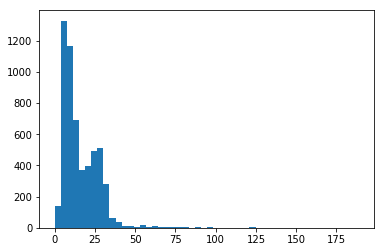

In [15]:
xdata=sequences
plt.hist([len(s) for s in xdata], bins=50)
plt.show()

In [16]:
#가장 긴 메일의 길이 : 189,
#50미만이 대부분(업데이트)

In [17]:
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [18]:
vocab_size=len(word_index)+1 #8920 + 1 => 8921

In [19]:
#전체 데이터셋의 길이를 189로 통일
max_len=189
data=pad_sequences(xdata, maxlen=max_len) #pre padding
data.shape

(5572, 189)

In [20]:
data[:5]
xtest = data[trainData:] #뒤쪽 1115개
ytest = ydata[trainData:]
xtrain = data[:trainData] #앞쪽 4457개
ytrain = ydata[:trainData]

In [21]:
model=Sequential()
model.add(Embedding(vocab_size,32))
model.add(SimpleRNN(32)) #히든 사이즈 32
model.add(Dense(1, activation='sigmoid'))

W0827 14:16:46.505223  2252 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 14:16:46.520582  2252 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 14:16:46.536190  2252 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [22]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
history=model.fit(xtrain, ytrain, batch_size=60, epochs=4,  validation_split=0.2)
print(model.evaluate(xtest, ytest)[1])

W0827 14:16:51.114964  2252 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 14:16:51.114964  2252 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0827 14:16:51.130607  2252 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0827 14:16:51.400634  2252 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assig

Train on 3565 samples, validate on 892 samples
Epoch 1/4
3565/3565 [==============================] - 2s 486us/step - loss: 0.4470 - acc: 0.8154 - val_loss: 0.3122 - val_acc: 0.8733
Epoch 2/4
3565/3565 [==============================] - 1s 372us/step - loss: 0.1608 - acc: 0.9649 - val_loss: 0.1092 - val_acc: 0.9697
Epoch 3/4
3565/3565 [==============================] - 1s 377us/step - loss: 0.0882 - acc: 0.9770 - val_loss: 0.1032 - val_acc: 0.9652
Epoch 4/4
1115/1115 [==============================] - 0s 180us/step
0.9820627802690582


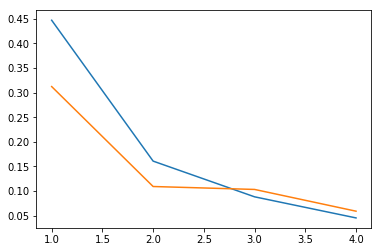

In [25]:
epochs=range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.show()